<a href="https://colab.research.google.com/github/berito/cv_project_2/blob/main/Tomato_leaf_VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing Necessary Libraries

In [1]:
!pip install kaggle

# Downloading Dataset from kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohsraj","key":"7b1972b0c76b1cf7fabf7dd7abffde49"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d noulam/tomato

Dataset URL: https://www.kaggle.com/datasets/noulam/tomato
License(s): copyright-authors
 98% 729M/743M [00:07<00:00, 107MB/s]
100% 743M/743M [00:07<00:00, 98.0MB/s]


In [7]:
import zipfile
import shutil
import os
zip_file_path = 'tomato.zip'
extract_dir = 'tomato_extracted'
os.makedirs(extract_dir, exist_ok=True)
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
specific_dir = os.path.join(extract_dir, 'New Plant Diseases Dataset(Augmented)')
dataset_dir = 'dataset'
os.makedirs(dataset_dir, exist_ok=True)
shutil.move(os.path.join(specific_dir, 'train'), os.path.join(dataset_dir, 'train'))
shutil.move(os.path.join(specific_dir, 'valid'), os.path.join(dataset_dir, 'valid'))
shutil.rmtree(extract_dir)
!ls dataset
!ls dataset/train
!ls dataset/valid

train  valid
 Tomato___Bacterial_spot   Tomato___Septoria_leaf_spot
 Tomato___Early_blight	  'Tomato___Spider_mites Two-spotted_spider_mite'
 Tomato___healthy	   Tomato___Target_Spot
 Tomato___Late_blight	   Tomato___Tomato_mosaic_virus
 Tomato___Leaf_Mold	   Tomato___Tomato_Yellow_Leaf_Curl_Virus
 Tomato___Bacterial_spot   Tomato___Septoria_leaf_spot
 Tomato___Early_blight	  'Tomato___Spider_mites Two-spotted_spider_mite'
 Tomato___healthy	   Tomato___Target_Spot
 Tomato___Late_blight	   Tomato___Tomato_mosaic_virus
 Tomato___Leaf_Mold	   Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [8]:
import numpy as np
import pandas as pd
import os

# loading the dataset

In [10]:
train_path='./dataset/train/'
print(os.listdir(train_path))
print("*"*100)
valid_path='./dataset/valid/'
print(os.listdir(valid_path))
folder=(os.listdir(train_path))
folder

['Tomato___Septoria_leaf_spot', 'Tomato___Target_Spot', 'Tomato___Late_blight', 'Tomato___Early_blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___Bacterial_spot', 'Tomato___Leaf_Mold', 'Tomato___healthy']
****************************************************************************************************
['Tomato___Septoria_leaf_spot', 'Tomato___Target_Spot', 'Tomato___Late_blight', 'Tomato___Early_blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___Bacterial_spot', 'Tomato___Leaf_Mold', 'Tomato___healthy']


['Tomato___Septoria_leaf_spot',
 'Tomato___Target_Spot',
 'Tomato___Late_blight',
 'Tomato___Early_blight',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Bacterial_spot',
 'Tomato___Leaf_Mold',
 'Tomato___healthy']

Text(0.5, 1.0, 'Tomato___Septoria_leaf_spot')

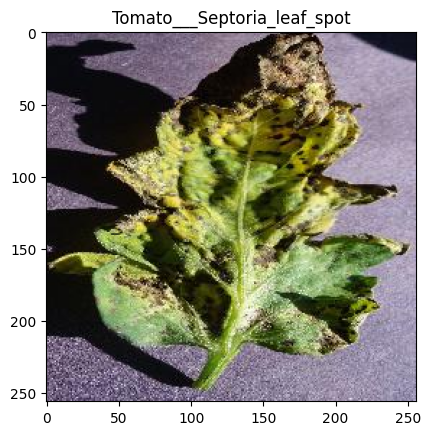

In [11]:
#  show image
ty=0      # type of deseases
index=25   # image index in the dataset.
import matplotlib.pyplot as plt
plt.imshow(plt.imread(train_path+folder[ty]+"/"+(os.listdir(train_path+folder[ty])[index])))
plt.title(folder[ty])

#### Importing packages

In [12]:
from tensorflow.keras.layers import Lambda, Dense , Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [13]:
size=[128,128]
vgg19=VGG19(input_shape=size+[3],weights='imagenet',include_top=False)

80134624/80134624 [==============================] - 0s 0us/step


# Freezing the rest of the layers

In [14]:
for layer in vgg19.layers:
    layer.trainable=False

## Creating the top layer for my desired prediction

In [15]:
x=Flatten()(vgg19.output)
prediction=Dense(len(folder),activation='softmax')(x)
model_vgg=Model(inputs=vgg19.input,outputs=prediction)

# Model Summary

In [16]:
model_vgg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

# Compiling the model

In [22]:
plateau = tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=7,
            verbose=0,
            mode='min')

In [24]:
model_vgg.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Data Augmentation

In [25]:
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)
train_set=train_datagen.flow_from_directory(train_path,
                                            target_size=(128,128),
                                            batch_size=16,
                                            class_mode='categorical',
                                            shuffle=True)
valid_set=valid_datagen.flow_from_directory(valid_path,
                                            target_size=(128,128),
                                            batch_size=16,
                                            class_mode='categorical',
                                            shuffle=False)

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [26]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
tb_callback=tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq=1)
history=model_vgg.fit(train_set,
                validation_data=valid_set,
                epochs=9,
                callbacks=[tb_callback]
                )

Epoch 1/9
1147/1147 [==============================] - 55s 44ms/step - loss: 0.7698 - accuracy: 0.7377 - val_loss: 0.5062 - val_accuracy: 0.8246
Epoch 2/9
1147/1147 [==============================] - 51s 44ms/step - loss: 0.4399 - accuracy: 0.8474 - val_loss: 0.4907 - val_accuracy: 0.8218
Epoch 3/9
1147/1147 [==============================] - 49s 42ms/step - loss: 0.3338 - accuracy: 0.8871 - val_loss: 0.4934 - val_accuracy: 0.8308
Epoch 4/9
1147/1147 [==============================] - 49s 43ms/step - loss: 0.2770 - accuracy: 0.9067 - val_loss: 0.4771 - val_accuracy: 0.8462
Epoch 5/9
1147/1147 [==============================] - 50s 43ms/step - loss: 0.2328 - accuracy: 0.9212 - val_loss: 0.4437 - val_accuracy: 0.8495
Epoch 6/9
1147/1147 [==============================] - 49s 43ms/step - loss: 0.1988 - accuracy: 0.9324 - val_loss: 0.4073 - val_accuracy: 0.8676
Epoch 7/9
1147/1147 [==============================] - 48s 42ms/step - loss: 0.1718 - accuracy: 0.9426 - val_loss: 0.4268 - val_ac

# Visualizing the Fitting of the model

Text(0.5, 1.0, 'Training and validation loss')

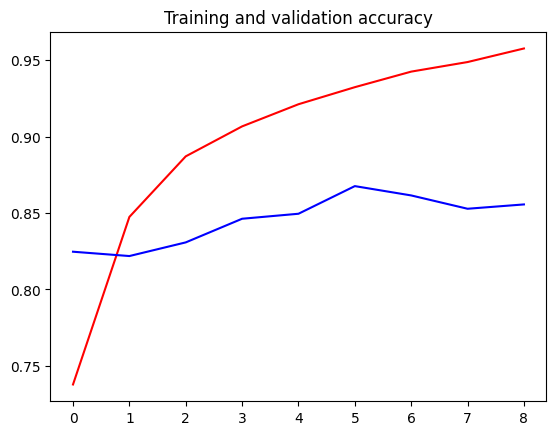

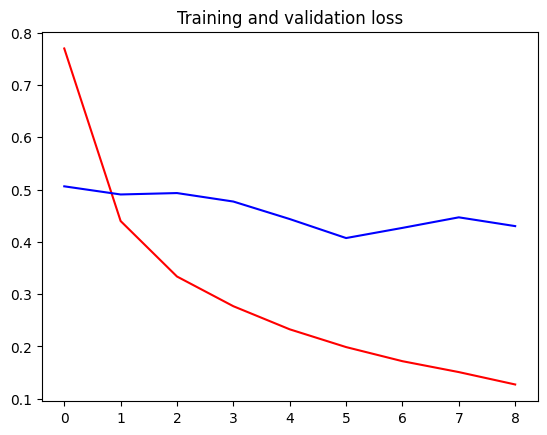

In [27]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', )
plt.plot(epochs, val_acc, 'b', )
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', )
plt.plot(epochs, val_loss, 'b', )


plt.title('Training and validation loss')

# Predicting the model

### %Load_ext tensorboard
### %tensorboard --Logdir Logs/fit

In [28]:
y_pred=model_vgg.predict(valid_set)

287/287 [==============================] - 9s 32ms/step


# saving the model

In [29]:
model_vgg.save('model_vgg19.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Checking the prediction of the model

In [30]:
import cv2
def prepare(filepath):
    img_array=cv2.imread(filepath,cv2.IMREAD_COLOR)
    img_array=img_array/255
    new_array=cv2.resize(img_array,(128,128))
    return new_array.reshape(-1,128,128,3)

In [31]:
class_dict=train_set.class_indices
class_dict

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [32]:
def prediction_cls(prediction):
    for key, clss in class_dict.items():
        if np.argmax(prediction)==clss:
            return key


In [33]:
ty=9
index=6
#import matplotlib.pyplot as plt
print(folder[ty])
pred=model_vgg.predict([prepare(valid_path+folder[ty]+"/"+(os.listdir(valid_path+folder[ty])[index]))])
prediction_cls(pred)
#plt.title(folder[ty])

Tomato___healthy
1/1 [==============================] - 1s 1s/step


'Tomato___Target_Spot'